In [1]:
"""
From https://www.postgresqltutorial.com/postgresql-python/connect/
for connecting to a database using a configuration file
"""
from configparser import ConfigParser

import psycopg2

class MyDatabase:
    def __init__(self):
        pass

    def open_conn(self):
        # read connection parameters and connect
        params = config()
        conn = psycopg2.connect(**params)
        # create a cursor
        cur = conn.cursor()
        return {'conn': conn, 'cur': cur}

    def query_fetch(self, sql, param=None):
        db = self.open_conn()
        # execute a statement
        if param:
            db['cur'].execute(sql, param)
        else:
            db['cur'].execute(sql)
        recs = db['cur'].fetchone()
        self.close(db)
        return recs

    def query_fetchall(self, sql, param=None):
        db = self.open_conn()
        # execute a statement
        if param:
            db['cur'].execute(sql, param)
        else:
            db['cur'].execute(sql)
        recs = db['cur'].fetchall()
        self.close(db)
        return recs

    
    def close(self, db):
        # close the communication with the PostgreSQL
        db['cur'].close()
        db['conn'].close()


def config(filename='database.ini', section='postgresql'):
    # create a parser
    parser = ConfigParser()
    # read config file
    parser.read(filename)

    # get section, default to postgresql
    db = {}
    if parser.has_section(section):
        params = parser.items(section)
        for param in params:
            db[param[0]] = param[1]
    else:
        raise Exception('Section {0} not found in the {1} file'.format(section, filename))

    return db

In [2]:
# top 30 domains
db = MyDatabase()
links = db.query_fetchall("SELECT count(*) from links")
print('Analyzing', links[0][0], 'links')

Analyzing 24282 links


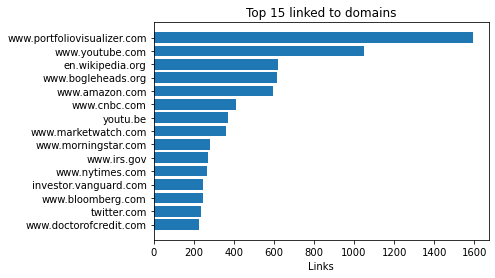

In [3]:
# top 10 domains
db = MyDatabase()
domains = db.query_fetchall("SELECT domain,count(domain) FROM links GROUP BY domain ORDER BY count(domain) DESC LIMIT 15;")
labels = [x[0] for x in domains]
counts = [x[1] for x in domains]

import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.barh(labels, counts, align='center')
ax.set_yticks(labels)
ax.set_yticklabels(labels)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Links')
ax.set_title('Top 15 linked to domains')

plt.show()

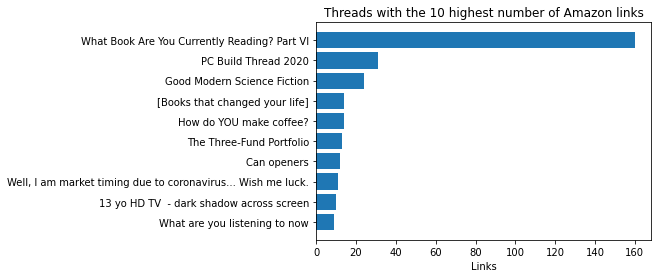

In [4]:
# Threads with the most Amazon links
db = MyDatabase()
threads = db.query_fetchall("SELECT threads.title, count(links.thread_id) FROM threads INNER JOIN links ON threads.id = links.thread_id WHERE links.url LIKE '%amazon%' GROUP BY threads.title ORDER BY count(links.thread_id) DESC LIMIT 10;")
labels = [x[0] for x in threads]
counts = [x[1] for x in threads]

fig, ax = plt.subplots()
ax.barh(labels, counts, align='center')
ax.set_yticks(labels)
ax.set_yticklabels(labels)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Links')
ax.set_title('Threads with the 10 highest number of Amazon links')

plt.show()

https://www.amazon.com/Lifecycle-Investing-Audacious-Performance-Retirement-ebook/dp/B003GYEGK2/ref=sr_1_3?keywords=lifecycle+investing&qid=1576692449&sr=8-3 8


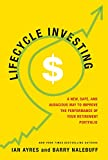

https://www.amazon.com/Count-Monte-Cristo-Penguin-Classics/dp/0140449264/ref=sr_1_3?s=books&ie=UTF8&qid=1533743857&sr=1-3&keywords=count+of+monte+cristo+unabridged 8


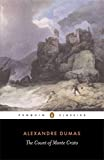

https://www.amazon.com/Don-Quixote-Miguel-Cervantes/dp/0060934344/ref=sr_1_1?ie=UTF8&qid=1492570562&sr=8-1&keywords=don+quixote+grossman 7


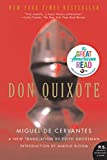

https://www.amazon.com/Balanced-Asset-Allocation-Economic-Climate/dp/1118711947 7


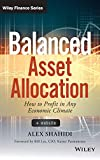

http://www.amazon.com/Dead-Wake-Last-Crossing-Lusitania-ebook/dp/B00N6PD3GE 6


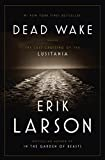

https://www.amazon.com/Bogleheads-Guide-Three-Fund-Portfolio-Outperforms/dp/1119487331 6


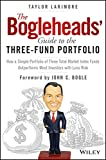

https://www.amazon.com/Intelligent-Asset-Allocator-Portfolio-Maximize/dp/1260026647 6


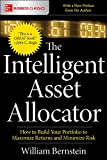

https://www.amazon.com/Bogleheads-Guide-Retirement-Planning/dp/0470919019 5


https://www.amazon.com/dp/B07H4XBM1R 5


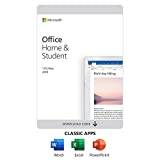

https://www.amazon.com/TCL-40S325-Inch-1080p-Smart/dp/B07GB61TQR/ref=mp_s_a_1_3?dchild=1&keywords=tlc+40%22+tv+with+roku&qid=1604958919&sprefix=tlc+40&sr=8-3 5


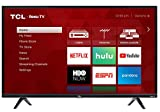

https://www.amazon.com/GoWISE-USA-GW22637-4th-Generation-measuring/dp/B01LVZY19H 5


https://www.amazon.com/TaoTronics-Equalizer-Bluetooth-Connection-Mountable/dp/B07KZ7MVS2/ref=mp_s_a_1_4?dchild=1&keywords=tv+soundbar&qid=1604958974&sr=8-4 5


http://www.amazon.com/Ill-Met-Moonlight-Stanley-Moss/dp/1589880668/ 4


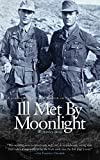

http://www.amazon.com/Snoopys-Guide-Writing-Barnaby-Conrad/dp/1582971943/ 4


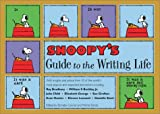

https://smile.amazon.com/Hooluana-Makaha-Sons-Niihau/dp/B00000I3UU/ref=ntt_mus_ep_dpi_5 4


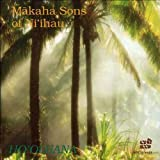

https://www.amazon.com/gp/product/B00JUUZU2E/ref=dbs_a_def_rwt_hsch_vapi_tkin_p1_i1 4


https://smile.amazon.com/Facing-Future-Israel-Kamakawiwoole-%E2%80%8E/dp/B00000JFG3/ref=tmm_acd_swatch_0?_encoding=UTF8&qid=1586714711&sr=8-1 4


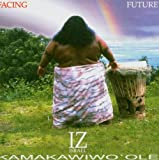

https://www.amazon.com/gp/product/B07WZW1LG4/ref=ppx_yo_dt_b_asin_title_o02_s00?ie=UTF8&psc=1 4


http://www.amazon.com/Snoopy-Was-Dark-Stormy-Night/dp/0030850797/ 4


https://www.amazon.com/dp/1118921283/ref=sspa_dk_detail_0?psc=1&pd_rd_i=1118921283&pd_rd_w=RgBMP&pf_rd_p=7d37a48b-2b1a-4373-8c1a-bdcc5da66be9&pd_rd_wg=UOaqA&pf_rd_r=PJHD0K2AS4HWQA17WXBD&pd_rd_r=96d2301a-0fe1-4821-87ff-6b72fca1c455&spLa=ZW5jcnlwdGVkUXVhbGlmaWVyPUFBQzg1U05SMjZVSkgmZW5jcnlwdGVkSWQ9QTAyMTE3NjQyNUtOSVk5TTlDQ0k5JmVuY3J5cHRlZEFkSWQ9QTAzNDgyNTcyMVdVSVpTM0NDUDIwJndpZGdldE5hbWU9c3BfZGV0YWlsJmFjdGlvbj1jbGlja1JlZGlyZWN0JmRvTm90TG9nQ2xpY2s9dHJ1ZQ== 4


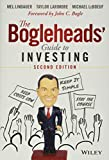

https://www.amazon.com/Triumph-Optimists-Global-Investment-Returns/dp/0691091943 4


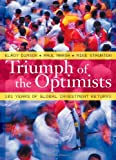

https://www.amazon.com/Bogleheads-Guide-Three-Fund-Portfolio-Outperforms/dp/1119487331/ref=pd_lpo_14_img_1/130-7073988-8639754?_encoding=UTF8&pd_rd_i=1119487331&pd_rd_r=9d767191-4c0d-4647-adb1-3fee63202c86&pd_rd_w=TmMUd&pd_rd_wg=q9ap7&pf_rd_p=7b36d496-f366-4631-94d3-61b87b52511b&pf_rd_r=AWWK5850FB1ZNMR3V65S&psc=1&refRID=AWWK5850FB1ZNMR3V65S 4


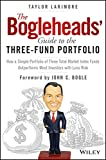

https://www.amazon.com/gp/product/B01MT5NGL7?ref=series_rw_dp_labf 4


In [5]:
# Top Amazon recommendations
import re
from IPython.core.display import Image, display

db = MyDatabase()
products = db.query_fetchall("SELECT url, count(url) FROM links WHERE url LIKE '%amazon%' GROUP BY url ORDER BY count(url) DESC LIMIT 25;")
for product in products:
    regex = re.search("[d][p][/]\w+", product[0])
    if not regex:
            regex = re.search("[t][/]\w+", product[0])
    if regex:
        amazon_id = regex.group(0)[3:]
        print(product[0], product[1])
        display(Image('http://images.amazon.com/images/P/'+amazon_id+'.01._PI_LZZZZZZZ_.jpg'))


In [6]:
# Top YouTube links
import urllib.request, json
import pandas as pd

db = MyDatabase()
links = db.query_fetchall("SELECT url, count(url) FROM links WHERE url LIKE '%youtube%' or url LIKE '%youtu.be%' GROUP BY url ORDER BY count(url) DESC LIMIT 10;")
for link in links:
    print(link[0], link[1])
    meta_url = 'http://www.youtube.com/oembed?url='+link[0]+'&format=json'
    with urllib.request.urlopen(meta_url) as url:
        data = json.loads(url.read().decode())
        print(data['title'])
        print(data['author_name'])



https://youtu.be/eVlqOid4GAI 17
RR #98 - Listener Questions, Wealthsimple's Victory Lap & the Historic State of Value Investing
The Rational Reminder Podcast
https://www.youtube.com/watch?v=0Wg_OTTzUv8 15
NYC ER doctor: I have to 'plead to test people' for coronavirus
CNBC Television
https://www.youtube.com/watch?v=mP0VHJYFOAU 11
Bohemian Rhapsody | Official Trailer [HD] | 20th Century FOX
20th Century Studios
https://www.youtube.com/watch?v=0ECqDaPjjV0 10
The Stock Market vs. The Economy
Ben Felix
https://www.youtube.com/watch?v=npBIDMSGDKg 9
Heartland Season 12 Trailer
Heartland
https://www.youtube.com/watch?v=A0gQiz0pCyI 8
John Bogle: all you need to know about investing in three words
Sensible Investing
https://www.youtube.com/watch?v=1lWJXDG2i0A 8
Tom Petty - Free Fallin'
TomPettyVEVO
https://www.youtube.com/watch?v=K3lP3BhvnSo 8
Understanding the Fed's "Money Printer" (QE, the Stock Market, and Inflation)
Ben Felix
https://www.youtube.com/watch?v=thyJOnasHVE 7
Bohemian Rhapsody W